In [9]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []
    weight_r = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
        pat = "dimer operator"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            dimer = [float(line)]
            
        pat = "average weight rate"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            weight_r = [float(line[0]), float(line[1])]

            
    return energy, sign, dimer, time, weight_r

## calculate exact value

In [3]:
from header import *

In [4]:
import os
import numpy as np
os.chdir("../../Release")
T =  np.logspace(-1, -0.3, num=10)

# original Majumdar-Ghosh model

## sampling energies for several temperature 

### L = 6

In [26]:
# def exp_energy(E, beta):
#     Z = np.exp(-beta*E)
#     EZ = E*Z
#     return np.sum(EZ)/np.sum(Z)
# E_exact = np.array([exp_energy(E_MG,1/t) for t in T])

In [24]:
L = np.arange(2, 15, 2)

In [35]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for l in np.arange(2, 15, 2):
    out = subprocess.Popen(["./test_/lattice_test", "-L1", f"{l}", "-T", "0.5"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    # print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array1 = np.array(sign_array)

In [27]:
energy_array

[[-1.75511, 0.00794338],
 [-3.1269, 0.0345291],
 [-4.96491, 0.0982948],
 [-6.5105, 0.386769],
 [-9.45903, 0.916193],
 [-16.885, 3.7591],
 [35.563, 103.915]]

In [29]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for l in np.arange(2, 15, 2):
    out = subprocess.Popen(["./test_/lattice_test", "-L1", f"{l}", "-T", "0.5"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    # print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array2 = np.array(sign_array)

In [37]:
import subprocess
energy_array = []
sign_array = []
time_array = []
L2 = [2, 3, 4]
for l in L2:
    out = subprocess.Popen(["./test_/lattice_test", "-L1", f"{l}", "-T", "0.5"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    # print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array3 = np.array(sign_array)

In [38]:
sign_array3

array([[0.220254  , 0.00068974],
       [0.111865  , 0.00070267],
       [0.053515  , 0.00070609]])

# L = 6, scheme 1 (special case)

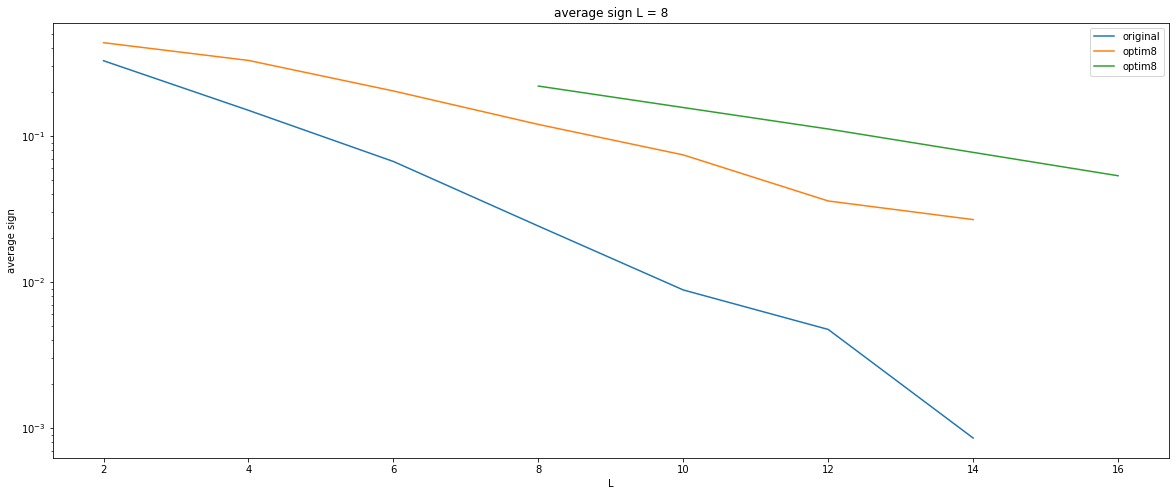

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(L, sign_array1[:,0], label = "original")
ax.plot(L, sign_array2[:,0], label = "optim8")
ax.plot(np.array(L2) * 4, sign_array3[:,0], label = "optim8")



ax.set_title(f'average sign L = 8')
ax.set_xlabel('L')
ax.set_ylabel('average sign')
ax.set_yscale('log')

ax.legend()
fig.show()

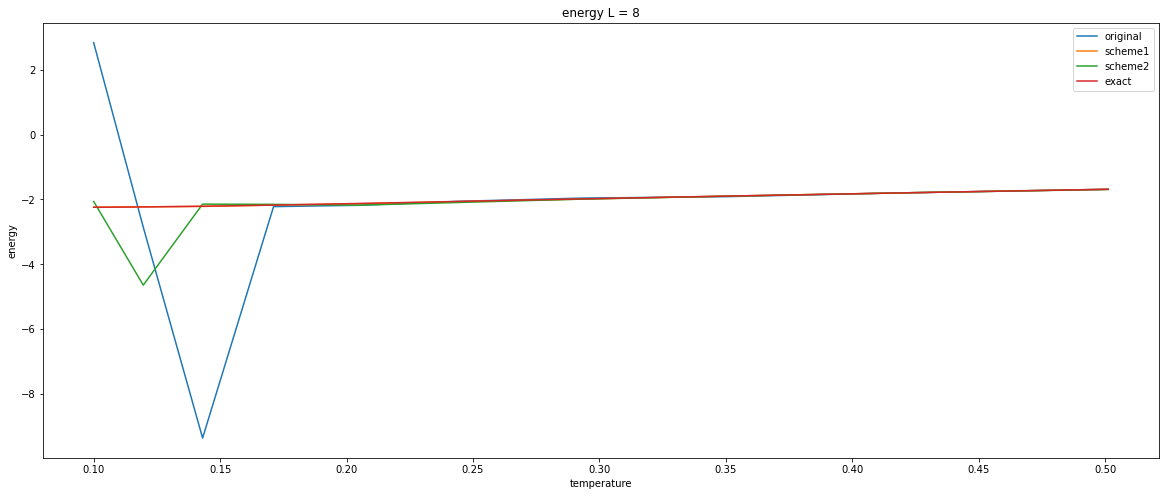

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array[:,0], label = "original")
ax.plot(T, energy_array2[:,0], label = "scheme1")
ax.plot(T, energy_array3[:,0], label = "scheme2")

ax.plot(T, E_exact[:], label = "exact")

ax.set_title(f'energy L = 8')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.show()

## L = 6 Reweighting 

In [10]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy", "-PATH2", "../python/array/MG_union_abs.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array = []
sign_array = []
time_array = []
weight_array = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    weight_array.append(weight)

T = 0.1 [-9.20198, 1876.59]
T = 0.11961283330787534 [-4.77857, 457.319]
T = 0.14307229891937576 [-5.54573, 73.451]
T = 0.1711328304161781 [-3.62451, 14.0525]
T = 0.2046968271807521 [-1.56813, 5.84637]
T = 0.24484367468222268 [-2.57311, 1.31698]
T = 0.2928644564625237 [-2.05272, 0.413549]
T = 0.3503034741265337 [-1.92398, 0.195934]
T = 0.41900791057866693 [-1.76627, 0.0895232]
T = 0.5011872336272722 [-1.71753, 0.0490967]


## L = 6 Reweighting

In [11]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond1.npy", "-PATH2", "../python/array/MG_union_abs1.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_abs1 = []
sign_array_abs1 = []
time_array_abs1 = []
weight_array_abs1 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_abs1.append(energy)
    sign_array_abs1.append(sign)
    time_array_abs1.append(time)
    weight_array_abs1.append(weight)

T = 0.1 [-3.61403, 3.2752]
T = 0.11961283330787534 [-3.82605, 2.1625]
T = 0.14307229891937576 [-0.344306, 12.0205]
T = 0.1711328304161781 [-3.93215, 2.17735]
T = 0.2046968271807521 [-10.441, 6.86864]
T = 0.24484367468222268 [-1.60903, 0.910623]
T = 0.2928644564625237 [-1.96695, 0.239194]
T = 0.3503034741265337 [-1.97821, 0.094893]
T = 0.41900791057866693 [-1.77284, 0.0498599]
T = 0.5011872336272722 [-1.6447, 0.0286078]


### L = 6 Reweighting2 

In [ ]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond1.npy", "-PATH2", "../python/array/MG_union_abs1.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_abs1 = []
sign_array_abs1 = []
time_array_abs1 = []
weight_array_abs1 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_abs1.append(energy)
    sign_array_abs1.append(sign)
    time_array_abs1.append(time)
    weight_array_abs1.append(weight)

### L = 12



In [10]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-7.13024, 15.0374]
T = 0.11961283330787534 [-6.78191, 6.82421]
T = 0.14307229891937576 [-6.10419, 22.5758]
T = 0.1711328304161781 [-6.43155, 6.55127]
T = 0.2046968271807521 [-6.34608, 6.70384]
T = 0.24484367468222268 [-9.76023, 9.49597]
T = 0.2928644564625237 [-3.74869, 0.727581]
T = 0.3503034741265337 [-3.59482, 0.216438]
T = 0.41900791057866693 [-3.55309, 0.0731322]
T = 0.5011872336272722 [-3.29993, 0.0314568]


In [15]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-5.62843, 9.0482]
T = 0.11961283330787534 [-6.6268, 7.63359]
T = 0.14307229891937576 [-7.00973, 11.2619]
T = 0.1711328304161781 [-4.74861, 2.36157]
T = 0.2046968271807521 [-6.06738, 5.18516]
T = 0.24484367468222268 [-4.40993, 0.734929]
T = 0.2928644564625237 [-3.80766, 0.245484]
T = 0.3503034741265337 [-3.68589, 0.0794423]
T = 0.41900791057866693 [-3.52396, 0.0336036]
T = 0.5011872336272722 [-3.3113, 0.0167905]


In [16]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


In [17]:
sign_array_12

array([[-0.000453  ,  0.00070711],
       [-0.000972  ,  0.00070711],
       [ 0.000279  ,  0.00070711],
       [-0.000986  ,  0.00070711],
       [ 0.000957  ,  0.00070711],
       [-0.000872  ,  0.00070711],
       [ 0.007225  ,  0.00070709],
       [ 0.023737  ,  0.00070691],
       [ 0.068434  ,  0.00070545],
       [ 0.150835  ,  0.00069902]])

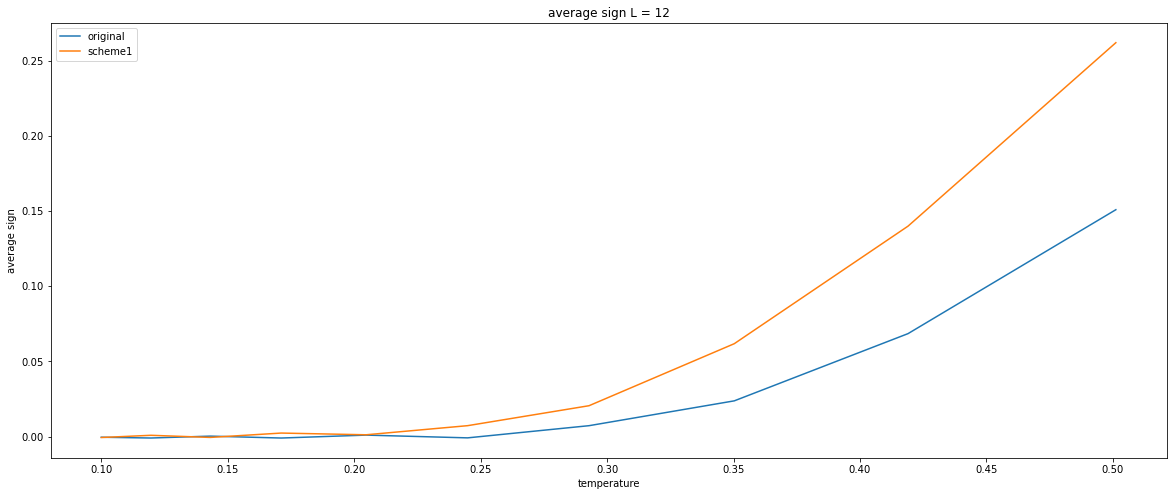

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L12.png")

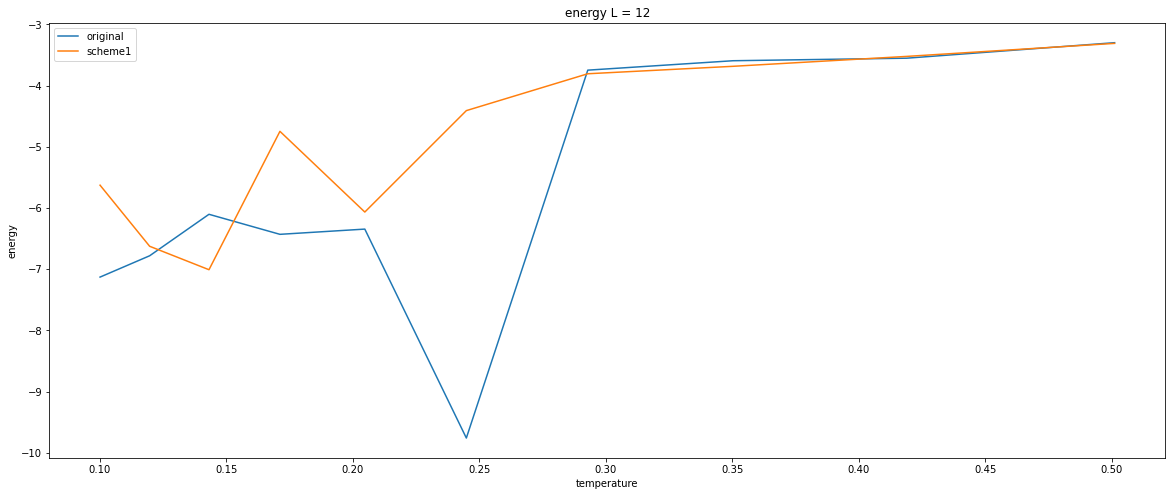

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L12.png")

### L = 18



In [27]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-10.5689, 13.1155]
T = 0.11961283330787534 [-7.60712, 14.9161]
T = 0.14307229891937576 [-10.8398, 12.4079]
T = 0.1711328304161781 [-9.77373, 11.104]
T = 0.2046968271807521 [-10.8335, 5.85687]
T = 0.24484367468222268 [-3.68201, 17.3682]
T = 0.2928644564625237 [-8.26919, 3.00431]
T = 0.3503034741265337 [-6.63511, 2.33449]
T = 0.41900791057866693 [-5.15509, 0.511456]
T = 0.5011872336272722 [-4.89099, 0.165893]


In [28]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-8.57304, 5.292]
T = 0.11961283330787534 [-7.39095, 8.69263]
T = 0.14307229891937576 [-11.0393, 20.6102]
T = 0.1711328304161781 [-7.27392, 36.6676]
T = 0.2046968271807521 [-1.93654, 12.6347]
T = 0.24484367468222268 [-10.35, 52.5535]
T = 0.2928644564625237 [-6.14557, 2.17611]
T = 0.3503034741265337 [-5.6284, 0.572936]
T = 0.41900791057866693 [-5.24486, 0.157389]
T = 0.5011872336272722 [-4.99807, 0.0630074]


In [29]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


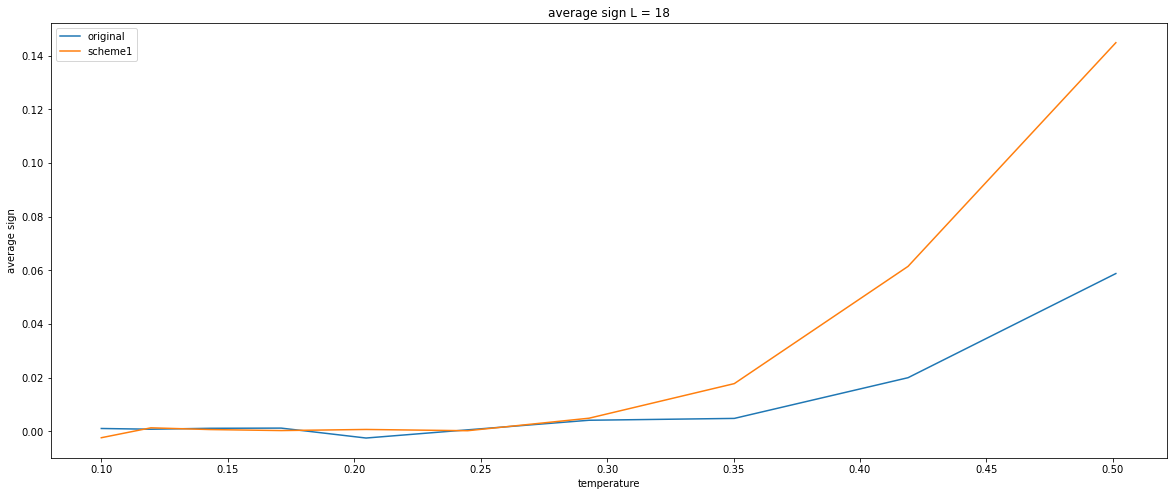

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L18.png")

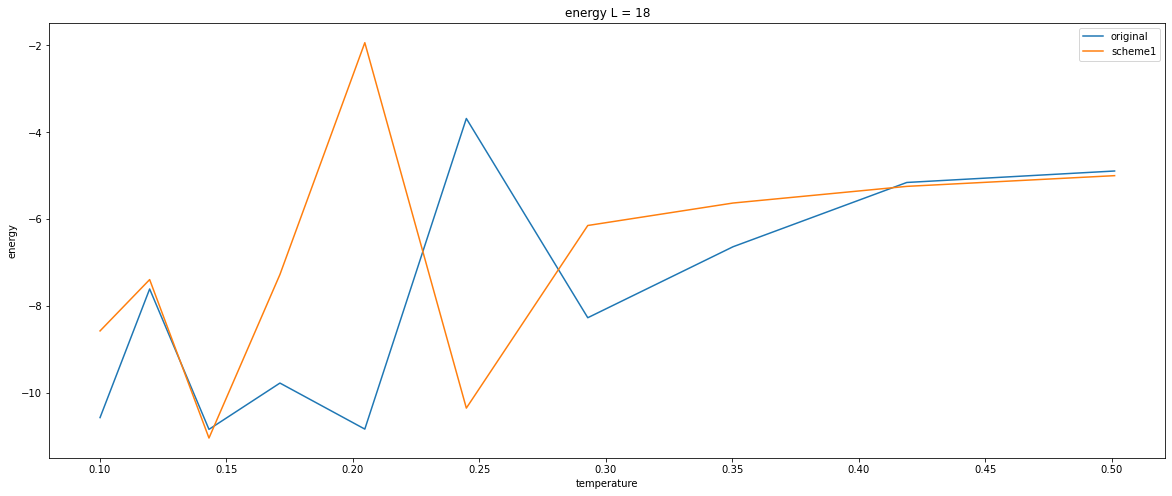

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L18.png")